# Importing required packages

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing dataset using pandas

In [43]:
df = pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [44]:
# Top five rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [45]:
df.drop('Serial No.',axis=1,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [47]:
df.sample(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
387,307,105,2,2.0,3.5,8.1,0,0.53
27,298,98,2,1.5,2.5,7.5,1,0.44


In [48]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


In [49]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

#### There is no null values

In [50]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

# Let's check the data distribution

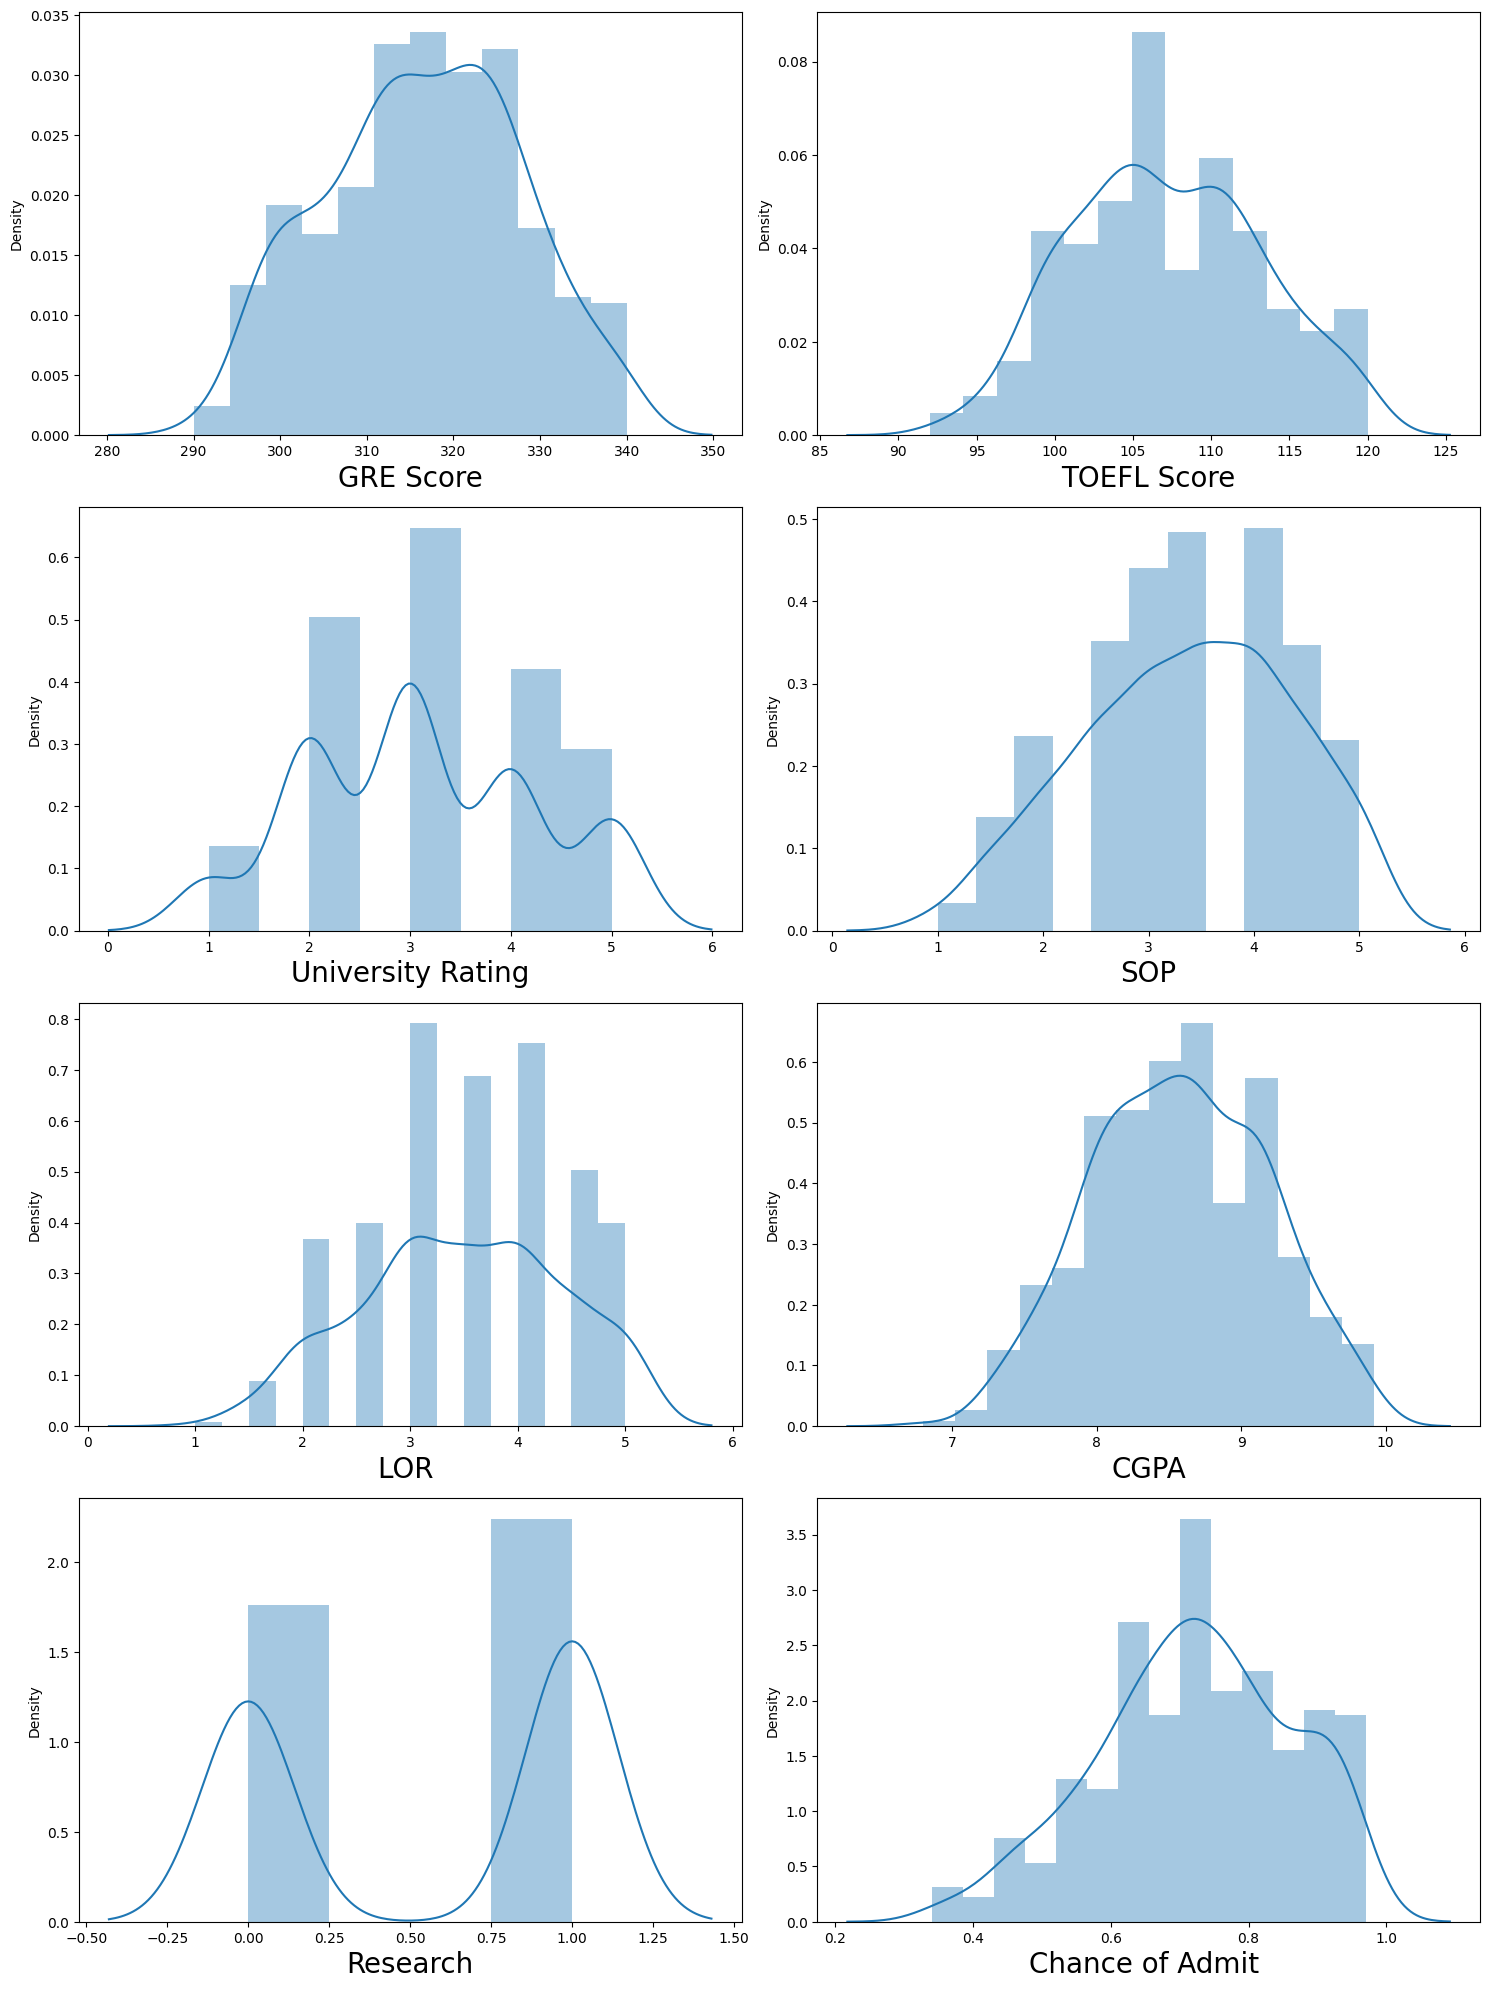

In [51]:
plt.figure(figsize=(15,20),facecolor='white')
plotnumber = 1
for i in df:
    if plotnumber <= 10:
        plt.subplot(4,2,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber += 1
plt.tight_layout()

# Finding correlation

<AxesSubplot:>

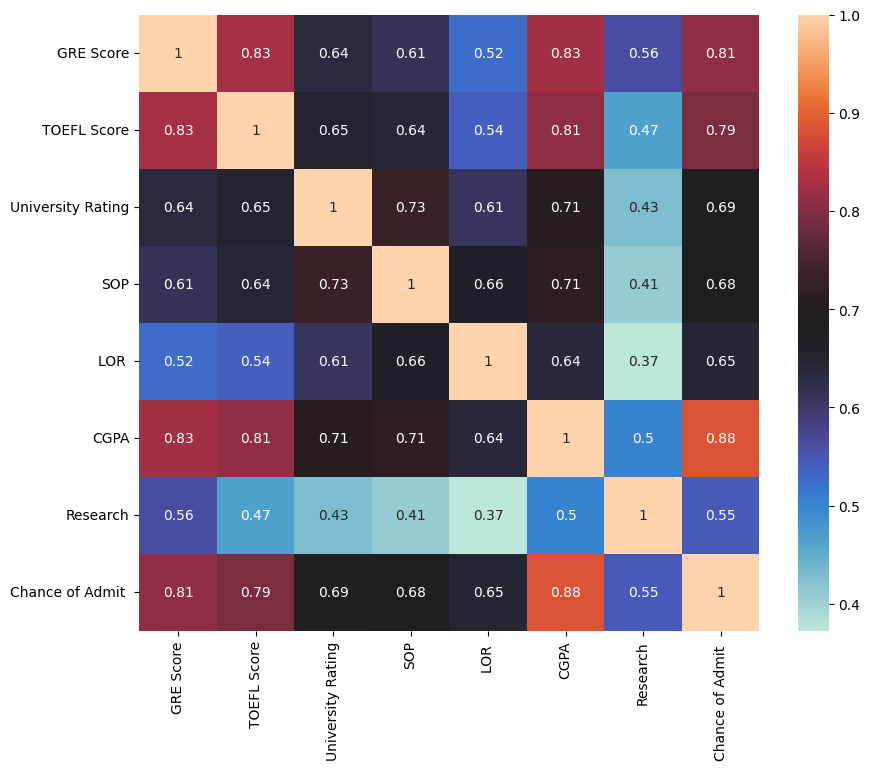

In [52]:
# Correlation
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True,cmap='icefire')

# Segregatting depending and independing columns

In [53]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [54]:
df['Chance of Admit'] = df['Chance of Admit '].replace(' ','')

In [55]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ', 'Chance of Admit'],
      dtype='object')

In [56]:
X = df.drop('Chance of Admit',axis=1)

In [57]:
y = df['Chance of Admit']

In [58]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [59]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

# Model Training

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [61]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
227,312,110,2,3.5,3.0,8.53,0,0.64
417,316,103,3,3.5,2.0,7.68,0,0.52
203,334,120,5,4.0,5.0,9.87,1,0.97
126,323,113,3,4.0,3.0,9.32,1,0.85
329,297,96,2,2.5,1.5,7.89,0,0.43
...,...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1,0.87
270,306,105,2,2.5,3.0,8.22,1,0.72
348,302,99,1,2.0,2.0,7.25,0,0.57
435,309,105,2,2.5,4.0,7.68,0,0.55


# Feature Scaling/Standardrization

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Implementing SVR

In [67]:
from sklearn.svm import SVR
classifier = SVR(kernel='rbf')
classifier.fit(X_train,y_train)

SVR()

# Predicting test result

In [68]:
y_pred = classifier.predict(X_test)

In [72]:
y_pred

array([0.87220289, 0.76593239, 0.50544538, 0.69680476, 0.75158378,
       0.84797484, 0.51027052, 0.58232679, 0.71727504, 0.76012091,
       0.57980777, 0.70770714, 0.62368931, 0.88120702, 0.78660677,
       0.50506774, 0.80729485, 0.58683283, 0.52829705, 0.58205892,
       0.63674497, 0.533567  , 0.66264008, 0.755608  , 0.72971991,
       0.61711567, 0.86971144, 0.81125874, 0.60371529, 0.70621937,
       0.52818282, 0.69244511, 0.52744998, 0.83926858, 0.65537384,
       0.6926874 , 0.55997172, 0.87219116, 0.62933128, 0.6164393 ,
       0.85703654, 0.48860631, 0.64346656, 0.84881357, 0.86875492,
       0.57279229, 0.89017034, 0.81569869, 0.74330218, 0.86261992,
       0.81892696, 0.58336815, 0.68075023, 0.53836656, 0.88048387,
       0.59943616, 0.86629026, 0.65782248, 0.6326304 , 0.47809838,
       0.62479022, 0.64725367, 0.57768619, 0.63079236, 0.51449199,
       0.52521831, 0.84775657, 0.84285639, 0.63713077, 0.66674848,
       0.59224551, 0.7574357 , 0.65592145, 0.54450061, 0.57244

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,r2_score
svr_r2_scored = r2_score(y_test,y_pred)
print("Model has {} % accuracy".format((svr_r2_scored)*100))

Model has 84.63143947399216 % accuracy


In [27]:
classifier.score(X_test,y_test)

0.8463143947399215

In [31]:
classifier.score(X_train,y_train)

0.8387419669725749